# Breast Cancer project



# KNN and Random forest performed better 

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.feature_selection import SelectFromModel

In [107]:
pd.set_option('display.max_columns',None)

In [108]:
df=pd.read_csv('../dataset/Breastcancer/data.csv')
df.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [109]:
df.dropna(inplace=True)

In [110]:
df['Class:'].value_counts()

2    458
4    241
Name: Class:, dtype: int64

In [111]:
df.replace('?',np.nan,inplace=True)

In [112]:
df.dropna(inplace=True)

In [113]:
df.drop('Sample code number',axis=1,inplace=True)

In [114]:
df['Bare Nuclei']=df['Bare Nuclei'].astype('int64')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class:                       683 non-null    int64
dtypes: int64(10)
memory usage: 58.7 KB


In [116]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [117]:
df.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class:                         0
dtype: int64

# Visualization

In [178]:
cormat=df.corr()
cormat

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
Clump Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class:,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


C:\Users\ghild\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


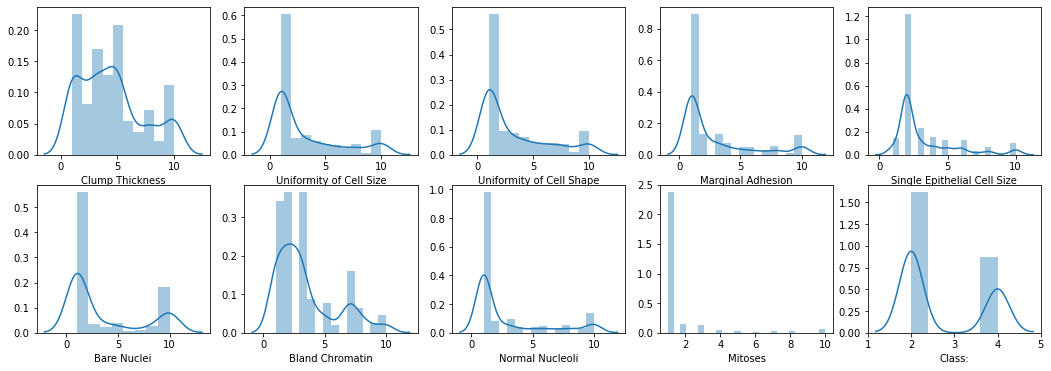

In [184]:
fig,ax=plt.subplots(2,5,figsize=(18,6))
index=0
for i in range(2):
    for j in range(5):
        sns.distplot(df[df.columns[index]],ax=ax[i][j])
        index=index+1

# Splitting data into training and testing

In [118]:
x=df.drop('Class:',axis=1)
y=df['Class:']

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=25)

# Scaling data

In [120]:
sc=StandardScaler().fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

# Building model

In [129]:
mdl=RandomForestClassifier()
mdl.fit(x_train,y_train)
pred=mdl.predict(x_test)

In [131]:
accuracy=accuracy_score(y_test,pred)
accuracy

0.9708029197080292

In [132]:
clas=classification_report(y_test,pred)
print(clas)

              precision    recall  f1-score   support

           2       1.00      0.96      0.98        96
           4       0.91      1.00      0.95        41

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137



In [133]:
con=confusion_matrix(y_test,pred)
con

array([[92,  4],
       [ 0, 41]], dtype=int64)

# XGBClassifier

In [19]:
from xgboost import XGBClassifier

In [20]:
clf=XGBClassifier()
clf.fit(x_train,y_train)
predi=clf.predict(x_test)
clas=classification_report(y_test,predi)
print(clas)
accuracy=accuracy_score(y_test,predi)
print(accuracy)
con=confusion_matrix(y_test,predi)
print(con)

              precision    recall  f1-score   support

           2       0.98      0.96      0.97        96
           4       0.91      0.95      0.93        41

    accuracy                           0.96       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

0.9562043795620438
[[92  4]
 [ 2 39]]


# Training model 

In [21]:
acc=[]
feature=[]
est=[]
def model(classifier,df2):
    x=df2.drop('Class:',axis=1)
    y=df2['Class:']
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=np.random.randint(1,100,1)[0])
    
    sc=StandardScaler().fit(x_train)
    x_train=sc.transform(x_train)
    x_test=sc.transform(x_test)
    
    
    
    clf=classifier()
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    
    a=classifier
    est.append(a)
    accu=accuracy_score(y_test,pred)
    clas=classification_report(y_test,pred)
    con=confusion_matrix(y_test,pred)
    
    acc.append(accuracy_score(y_test,pred))
    feature.append(len(x.columns))
    
    print('No of features:',len(x.columns))
    print('accuracy', accu)
    print('classification_report:',clas)
    print('confusion_matrix:',con)
    
    df3=pd.DataFrame(data=[est,feature,acc],index=['classifier','features','acc'])
    
    return df3
        
    
    
   

In [22]:
model(LogisticRegression,df)
model(DecisionTreeClassifier,df)
model(SVC,df)
model(KNeighborsClassifier,df)
model(RandomForestClassifier,df).T

No of features: 9
accuracy 0.9635036496350365
classification_report:               precision    recall  f1-score   support

           2       1.00      0.94      0.97        89
           4       0.91      1.00      0.95        48

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

confusion_matrix: [[84  5]
 [ 0 48]]
No of features: 9
accuracy 0.9562043795620438
classification_report:               precision    recall  f1-score   support

           2       0.96      0.98      0.97        93
           4       0.95      0.91      0.93        44

    accuracy                           0.96       137
   macro avg       0.96      0.94      0.95       137
weighted avg       0.96      0.96      0.96       137

confusion_matrix: [[91  2]
 [ 4 40]]
No of features: 9
accuracy 0.9635036496350365
classification_report:               precision    recall  f1-score   support

          

,classifier,features,acc
0,<class 'sklearn.linear_model._logistic.Logisti...,9,0.963504
1,<class 'sklearn.tree._classes.DecisionTreeClas...,9,0.956204
2,<class 'sklearn.svm._classes.SVC'>,9,0.963504
3,<class 'sklearn.neighbors._classification.KNei...,9,0.985401
4,<class 'sklearn.ensemble._forest.RandomForestC...,9,0.970803


# Feature selection using corr and then building linear model

In [25]:
cormat=df.corr()

In [26]:
r2=[]
mse=[]
mae=[]
features=[]
name=[]



def model(data,threshold):
    feat=[]
    values=[]
    for i,index in enumerate(data.index):
        if abs(data[index])>threshold:
            feat.append(index)
            values.append(data[index])
    df1=pd.DataFrame(data=values,index=feat,columns=['corr values'])
    df2=df[df1.index.values]
    
    
    
    x=df2.drop('Class:',axis=1)
    y=df2['Class:']
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=np.random.randint(1,100,1)[0])
    
    sc=StandardScaler().fit(x_train)
    x_train=sc.transform(x_train)
    x_test=sc.transform(x_test)
    
    feature=x.shape[1]
    
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    
    
    
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    mae.append(mean_absolute_error(y_test,pred))
    features.append(feature)
    name.append(x.columns)
    
    
    df3=pd.DataFrame(data=[name,features,r2,mae,mse],index=['name','features','r2','mae','mse'])
    
    return df3
    
    
    
    

In [28]:
model(cormat['Class:'],0.55).T
model(cormat['Class:'],0.50).T
model(cormat['Class:'],0.45).T
model(cormat['Class:'],0.40).T
model(cormat['Class:'],0.35).T

,name,features,r2,mae,mse
0,"Index(['Uniformity of Cell Size', 'Uniformity ...",3,0.690723,0.324534,0.30056
1,"Index(['Uniformity of Cell Size', 'Uniformity ...",4,0.75376,0.289264,0.217259
2,"Index(['Clump Thickness', 'Uniformity of Cell ...",7,0.825289,0.264491,0.159063
3,"Index(['Clump Thickness', 'Uniformity of Cell ...",8,0.83674,0.250699,0.154901
4,"Index(['Clump Thickness', 'Uniformity of Cell ...",8,0.825046,0.244671,0.162193
5,"Index(['Clump Thickness', 'Uniformity of Cell ...",8,0.871705,0.23493,0.114454
6,"Index(['Clump Thickness', 'Uniformity of Cell ...",8,0.840854,0.255454,0.148759
7,"Index(['Clump Thickness', 'Uniformity of Cell ...",8,0.831829,0.255108,0.15956
8,"Index(['Clump Thickness', 'Uniformity of Cell ...",9,0.866742,0.232022,0.128082
9,"Index(['Clump Thickness', 'Uniformity of Cell ...",9,0.817535,0.281284,0.170556


# Selecting features using Lasso regulization tech. and then building model

In [71]:
sel=SelectFromModel(LogisticRegression(penalty='l1',C=0.1,solver='liblinear')).fit(x_train,y_train)

In [72]:
sel.get_support()

array([ True,  True,  True,  True, False,  True, False,  True, False])

In [73]:
x_train10=sel.transform(x_train)
x_test10=sel.transform(x_test)

In [74]:
sc=StandardScaler().fit(x_train10)
x_train10=sc.transform(x_train10)
x_test10=sc.transform(x_test10)

In [75]:
x_train10.shape

(546, 6)

In [76]:
def Las(x_train,x_test,y_train,y_test):
    clf=LogisticRegression ()
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    accu=accuracy_score(y_test,pred)
    clas=classification_report(y_test,pred)
    con=confusion_matrix(y_test,pred)
   
    print('accuracy', accu)
    print('classification_report:',clas)
    print('confusion_matrix:',con)

In [77]:
Las(x_train10,x_test10,y_train,y_test)

accuracy 0.9635036496350365
classification_report:               precision    recall  f1-score   support

           2       0.98      0.97      0.97        96
           4       0.93      0.95      0.94        41

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

confusion_matrix: [[93  3]
 [ 2 39]]


# KNN

In [156]:
neigh=list(range(1,30,1))
scores=[]
for k in neigh:
    knn=KNeighborsClassifier(n_neighbors=k)
    sel=cross_val_score(knn,x_train,y_train,scoring='accuracy',cv=10)
    scores.append(sel.mean())

In [158]:
mse=[1- x for x in scores]

In [161]:
mse=np.array(mse)
mse=pd.Series(mse).sort_values()
mse

8     0.025657
10    0.027475
9     0.027475
14    0.027508
20    0.027508
16    0.027508
15    0.027508
12    0.027508
7     0.029293
13    0.029327
18    0.029360
17    0.029360
6     0.031145
5     0.031145
4     0.031145
11    0.031145
22    0.031212
19    0.031212
24    0.033064
23    0.033064
3     0.034781
21    0.034882
2     0.038485
25    0.038519
26    0.038519
28    0.038519
27    0.038519
0     0.049461
1     0.056801
dtype: float64

In [154]:
mse.idxmin()

8

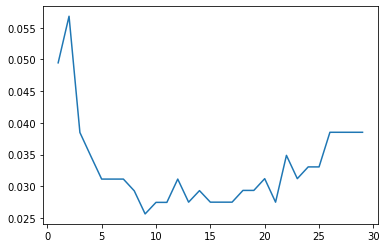

In [139]:
plt.plot(neigh,mse)

In [173]:
mdl=KNeighborsClassifier(n_neighbors=8)
mdl.fit(x_train,y_train)
pred=mdl.predict(x_test)

In [174]:
accuracy=accuracy_score(y_test,pred)
accuracy

0.9708029197080292

In [164]:
clas=classification_report(y_test,pred)
print(clas)

              precision    recall  f1-score   support

           2       0.99      0.97      0.98        96
           4       0.93      0.98      0.95        41

    accuracy                           0.97       137
   macro avg       0.96      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137

